# SVD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_sample.csv')

In [9]:
# Lấy các cột life và continent, country
# # Bắt đầu life hoặc c
life = df.loc[:,df.columns.str.contains('^life|^c')]
life

,continent,country,lifeExp_1952,lifeExp_1957,lifeExp_1962,lifeExp_1967,lifeExp_1972,lifeExp_1977,lifeExp_1982,lifeExp_1987,lifeExp_1992,lifeExp_1997,lifeExp_2002,lifeExp_2007
0,Africa,Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
1,Africa,Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
2,Africa,Benin,38.223,40.358,42.618,44.885,47.014,49.190,50.904,52.337,53.919,54.777,54.406,56.728
3,Africa,Botswana,47.622,49.618,51.520,53.298,56.024,59.319,61.484,63.622,62.745,52.556,46.634,50.728
4,Africa,Burkina Faso,31.975,34.906,37.814,40.697,43.591,46.137,48.122,49.557,50.260,50.324,50.650,52.295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Europe,Switzerland,69.620,70.560,71.320,72.770,73.780,75.390,76.210,77.410,78.030,79.370,80.620,81.701
138,Europe,Turkey,43.585,48.079,52.098,54.336,57.005,59.507,61.036,63.108,66.146,68.835,70.845,71.777
139,Europe,United Kingdom,69.180,70.420,70.760,71.360,72.010,72.760,74.040,75.007,76.420,77.218,78.471,79.425
140,Oceania,Australia,69.120,70.330,70.930,71.100,71.930,73.490,74.740,76.320,77.560,78.830,80.370,81.235


In [11]:
# Lấy  continent = Africa, Europe
life_afica_europe = life[life.continent.isin(['Africa', 'Europe'])]
life_afica_europe

,continent,country,lifeExp_1952,lifeExp_1957,lifeExp_1962,lifeExp_1967,lifeExp_1972,lifeExp_1977,lifeExp_1982,lifeExp_1987,lifeExp_1992,lifeExp_1997,lifeExp_2002,lifeExp_2007
0,Africa,Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
1,Africa,Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
2,Africa,Benin,38.223,40.358,42.618,44.885,47.014,49.190,50.904,52.337,53.919,54.777,54.406,56.728
3,Africa,Botswana,47.622,49.618,51.520,53.298,56.024,59.319,61.484,63.622,62.745,52.556,46.634,50.728
4,Africa,Burkina Faso,31.975,34.906,37.814,40.697,43.591,46.137,48.122,49.557,50.260,50.324,50.650,52.295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Europe,Spain,64.940,66.660,69.690,71.440,73.060,74.390,76.300,76.900,77.570,78.770,79.780,80.941
136,Europe,Sweden,71.860,72.490,73.370,74.160,74.720,75.440,76.420,77.190,78.160,79.390,80.040,80.884
137,Europe,Switzerland,69.620,70.560,71.320,72.770,73.780,75.390,76.210,77.410,78.030,79.370,80.620,81.701
138,Europe,Turkey,43.585,48.079,52.098,54.336,57.005,59.507,61.036,63.108,66.146,68.835,70.845,71.777


In [13]:
life_afica_europe['continent'].value_counts()

Africa    52
Europe    30
Name: continent, dtype: int64

In [15]:
df_data = life_afica_europe.drop(columns = ['continent', 'country'])
df_data

,lifeExp_1952,lifeExp_1957,lifeExp_1962,lifeExp_1967,lifeExp_1972,lifeExp_1977,lifeExp_1982,lifeExp_1987,lifeExp_1992,lifeExp_1997,lifeExp_2002,lifeExp_2007
0,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
1,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
2,38.223,40.358,42.618,44.885,47.014,49.190,50.904,52.337,53.919,54.777,54.406,56.728
3,47.622,49.618,51.520,53.298,56.024,59.319,61.484,63.622,62.745,52.556,46.634,50.728
4,31.975,34.906,37.814,40.697,43.591,46.137,48.122,49.557,50.260,50.324,50.650,52.295
...,...,...,...,...,...,...,...,...,...,...,...,...
135,64.940,66.660,69.690,71.440,73.060,74.390,76.300,76.900,77.570,78.770,79.780,80.941
136,71.860,72.490,73.370,74.160,74.720,75.440,76.420,77.190,78.160,79.390,80.040,80.884
137,69.620,70.560,71.320,72.770,73.780,75.390,76.210,77.410,78.030,79.370,80.620,81.701
138,43.585,48.079,52.098,54.336,57.005,59.507,61.036,63.108,66.146,68.835,70.845,71.777


In [17]:
# scaled
# min_max or stada

df_data_scaled = (df_data - df_data.mean()) / df_data.std()
df_data_scaled

,lifeExp_1952,lifeExp_1957,lifeExp_1962,lifeExp_1967,lifeExp_1972,lifeExp_1977,lifeExp_1982,lifeExp_1987,lifeExp_1992,lifeExp_1997,lifeExp_2002,lifeExp_2007
0,-0.394065,-0.362388,-0.318266,-0.220089,-0.116843,0.020739,0.168041,0.426042,0.511124,0.581049,0.662703,0.673421
1,-1.364384,-1.377154,-1.391081,-1.408750,-1.438966,-1.491952,-1.619589,-1.767824,-1.619366,-1.591543,-1.517351,-1.505745
2,-0.754648,-0.757365,-0.744677,-0.722776,-0.714866,-0.699566,-0.704999,-0.714568,-0.575861,-0.526866,-0.543083,-0.474234
3,-0.056436,-0.070770,-0.076971,-0.074339,0.003176,0.127267,0.177719,0.241589,0.118080,-0.698043,-1.108032,-0.916405
4,-1.218785,-1.161611,-1.105007,-1.045569,-0.987659,-0.948784,-0.937109,-0.950112,-0.863548,-0.870069,-0.816108,-0.800924
...,...,...,...,...,...,...,...,...,...,...,...,...
135,1.230043,1.192832,1.285893,1.323968,1.360842,1.357516,1.413858,1.366609,1.283689,1.322331,1.301360,1.310147
136,1.744100,1.625105,1.561917,1.533614,1.493134,1.443228,1.423870,1.391180,1.330078,1.370116,1.320259,1.305947
137,1.577700,1.482003,1.408154,1.426479,1.418222,1.439147,1.406349,1.409820,1.319857,1.368575,1.362420,1.366156
138,-0.356328,-0.184881,-0.033617,0.005666,0.081356,0.142613,0.140341,0.198039,0.385482,0.556618,0.651872,0.634805


In [ ]:
# Bài toán phần cụm cho dataset df_data_scaled. có số chiều: 12

In [ ]:
# Thư viện SVD
# numpy : np.linalg.svd
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [18]:
u, s, vh = np.linalg.svd(df_data_scaled)

In [19]:
u

array([[ 0.01493955, -0.21234611,  0.10569186, ...,  0.14475593,
        -0.07521348,  0.17221942],
       [-0.17265594,  0.04623821, -0.07069646, ..., -0.05144835,
         0.20114062, -0.022498  ],
       [-0.07590623, -0.04577334,  0.00221011, ...,  0.06197953,
        -0.14951372,  0.15073811],
       ...,
       [ 0.16214209,  0.01105033, -0.03620287, ...,  0.91706271,
         0.04472956, -0.04171283],
       [ 0.0207029 , -0.16397981,  0.03447434, ...,  0.02909206,
         0.88113657,  0.0471575 ],
       [ 0.14735096,  0.0303275 , -0.06551876, ..., -0.04423799,
         0.06253062,  0.92285512]])

In [20]:
s

array([30.24364085,  6.22029408,  3.64162999,  1.73218438,  1.02337101,
        0.90383377,  0.50601323,  0.29280646,  0.26630751,  0.21192836,
        0.16923088,  0.13317875])

In [22]:
vh

array([[ 2.87747601e-01,  2.90290567e-01,  2.91749398e-01,
         2.93099969e-01,  2.93843445e-01,  2.94697310e-01,
         2.94258619e-01,  2.93101291e-01,  2.85273510e-01,
         2.85079210e-01,  2.78371286e-01,  2.75823714e-01],
       [ 2.84067576e-01,  2.73240893e-01,  2.56380081e-01,
         2.32411293e-01,  2.03499465e-01,  1.54447664e-01,
         8.83406844e-02, -1.37828992e-03, -2.06472392e-01,
        -3.87744848e-01, -4.76758384e-01, -4.81198203e-01],
       [-2.97433998e-01, -2.41459696e-01, -1.80719226e-01,
        -1.05616410e-01,  1.04577870e-02,  1.42961241e-01,
         2.79221008e-01,  3.87798383e-01,  5.47203193e-01,
         1.22645040e-01, -3.04023709e-01, -3.91935164e-01],
       [ 4.66654101e-01,  2.64099932e-01,  5.91160517e-02,
        -1.14359552e-01, -2.83277503e-01, -3.10546024e-01,
        -3.14069683e-01, -2.03468186e-01,  4.73478873e-01,
         3.02774335e-01, -8.64048221e-02, -2.36364088e-01],
       [ 5.06647389e-01,  1.95660614e-02, -2.8412631

In [ ]:
# variance explained ( Xem lại phần PCA, bước 5)
# Để chọn số chiều cho thích hợp 

# Bài tập về nhà.

In [32]:

# Xét số chiều K = 2.
K = 2
svd_df = pd.DataFrame(u[:, 0:K], columns = ['SVD1', 'SVD2'])
svd_df['continent'] = life_afica_europe['continent'].tolist()


In [34]:
svd_df

,SVD1,SVD2,continent
0,0.014940,-0.212346,Africa
1,-0.172656,0.046238,Africa
2,-0.075906,-0.045773,Africa
3,-0.021360,0.189510,Africa
4,-0.111868,-0.052854,Africa
...,...,...,...
77,0.150337,-0.017090,Europe
78,0.167552,0.045535,Europe
79,0.162142,0.011050,Europe
80,0.020703,-0.163980,Europe


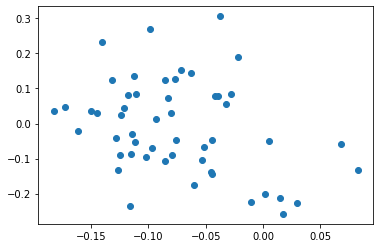

In [36]:
plt.scatter(svd_df.query('continent == "Africa"')['SVD1'], svd_df.query('continent == "Africa"')['SVD2'])

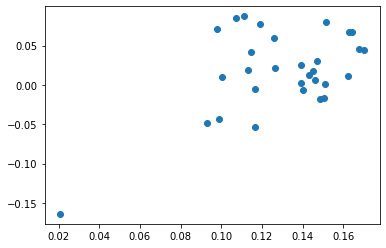

In [37]:
plt.scatter(svd_df.query('continent == "Europe"')['SVD1'], svd_df.query('continent == "Europe"')['SVD2'])

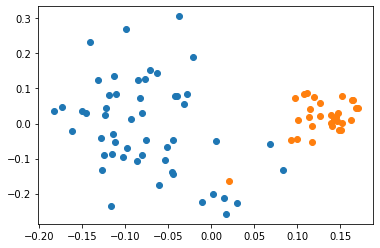

In [38]:
plt.scatter(svd_df.query('continent == "Africa"')['SVD1'], svd_df.query('continent == "Africa"')['SVD2'])
plt.scatter(svd_df.query('continent == "Europe"')['SVD1'], svd_df.query('continent == "Europe"')['SVD2'])


In [ ]:
# Bài toán từ 12 chiều xuống còn 2 chiều.

In [ ]:
# Chạy thuật toán phân cụm, Kmeans....

# Bài tập về nhà

Dùng dataset trên.

Sử lý dataset đến phần 
df_data = life_afica_europe.drop(columns = ['continent', 'country'])

Theo ví dụ trên.

1. Chạy thuật toán phân cụm cho df_data, với số lượng columns = 12 (nghĩa là chưa xử lý scaled, giảm chiều).

2. Xử lý scaled và chạy thuật toán SVD để giảm chiều và chọn số chiều thích hợp. Rồi mới chạy thuật toán phân cụm.

3. So sánh giữa 2 cách làm trên.

4. Code lại thuật toán SVD (Không dùng thư viện numpy.linalg.svd). Tham khảo (https://towardsdatascience.com/simple-svd-algorithms-13291ad2eef2)
